### Analysis of human ribosome profiling dataset (Park et al. 2016; PMID: 27153541) using ribotricer

#### Predict ORFs from transcriptome

In [1]:
from riboss.orfs import orf_finder
import pyranges as pr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

annotation='../ref/hg38/gencode.v47.annotation.bed'
tx = '../ref/hg38/gencode.v47.pc_transcripts.fa'
start_codon='ATG'
stop_codon=True

cds_range, df = orf_finder(annotation, tx, ncrna=False, outdir=None, start_codon=start_codon, stop_codon=stop_codon)

finding all ORFs       : 100%|████████████████████████████████████| 112k/112k [02:09<00:00, 868it/s]
converting coordinates : 100%|█████████████████████████████████| 2.35M/2.35M [00:11<00:00, 209kit/s]
converting coordinates : 100%|████████████████████████████████| 2.29M/2.29M [03:09<00:00, 12.1kit/s]
INFO:root:found 1249452 ORFs in 9 min 47 s
INFO:root:saved sequences as ../ref/hg38/gencode.v47.annotation.transcripts.fa
INFO:root:saved sequences as ../ref/hg38/gencode.v47.annotation.gp
INFO:root:saved sequences as ../ref/hg38/gencode.v47.annotation.orf_finder.pkl.gz
INFO:root:saved CDS range as ../ref/hg38/gencode.v47.annotation.cds_range.txt


In [2]:
df.value_counts('ORF_type')

ORF_type
dORF    1052749
uORF     102643
mORF      81697
oORF      12363
Name: count, dtype: int64

In [3]:
df.value_counts(['ORF_type','Strand'])

ORF_type  Strand
dORF      +         537926
          -         514823
uORF      +          51420
          -          51223
mORF      +          41730
          -          39967
oORF      -           7239
          +           5124
Name: count, dtype: int64

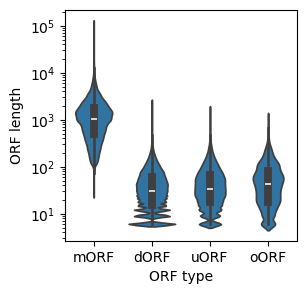

In [6]:
import os

fpath = '../results/park_2016_datasets/orf_finder/' 
if not os.path.exists(fpath):
    os.makedirs(fpath)
    
plt.figure(figsize=(3,3))
sns.violinplot(data=df, x='ORF_type', y='ORF_length', log_scale=True)
plt.xlabel('ORF type')
plt.ylabel('ORF length')
plt.savefig(fpath + 'orf_finder.pdf', bbox_inches='tight')

#### Build a STAR index for the human transcriptome

In [1]:
import os
from riboss.wrapper import build_star_index

tx = '../ref/hg38/gencode.v47.pc_transcripts.fa'
index = os.path.split(tx)[0] + '/' + '.'.join(os.path.split(tx)[1].split(os.extsep)[:-1])

build_star_index(tx, index, delim='|')

INFO:root:renamed ../ref/gencode.v47.pc_transcripts.fa as ../ref/gencode.v47.pc_transcripts.original.fasta
INFO:root:cleaned up fasta headers and saved as ../ref/gencode.v47.pc_transcripts.fa


	/home/limch05p/miniforge3/envs/riboss/bin/STAR-avx2 --runMode genomeGenerate --runThreadN 4 --genomeDir ../ref/gencode.v47.pc_transcripts --genomeFastaFiles ../ref/gencode.v47.pc_transcripts.fa --genomeSAindexNbases 7 --genomeChrBinNbits 11
	STAR version: 2.7.11b   compiled: 2024-07-03T14:39:20+0000 :/opt/conda/conda-bld/star_1720017372352/work/source
Feb 01 10:18:38 ..... started STAR run
Feb 01 10:18:38 ... starting to generate Genome files
Feb 01 10:18:41 ... starting to sort Suffix Array. This may take a long time...
Feb 01 10:18:43 ... sorting Suffix Array chunks and saving them to disk...
Feb 01 10:20:55 ... loading chunks from disk, packing SA...
Feb 01 10:21:06 ... finished generating suffix array
Feb 01 10:21:06 ... generating Suffix Array index
Feb 01 10:21:06 ... completed Suffix Array index
Feb 01 10:21:06 ... writing Genome to disk ...
Feb 01 10:21:08 ... writing Suffix Array to disk ...


INFO:root:saved index to ../ref/gencode.v47.pc_transcripts


Feb 01 10:21:17 ... writing SAindex to disk
Feb 01 10:21:17 ..... finished successfully


In [3]:
from glob import glob
from riboss.wrapper import align_short_reads

num_threads = 32
clip_3p_adapter_seq = 'TGGAATTCTCGGGTGCC'
sam_type = 'BAM Unsorted'

for i in glob('../doc/park_2016_datasets/*/*.fastq.gz'):
    prefix = os.path.split(i)[0] + '/' + '.'.join(os.path.split(i)[1].split(os.extsep)[:-2])
    align_short_reads(i, prefix, index, num_threads=num_threads, clip_3p_adapter_seq=clip_3p_adapter_seq, sam_type=sam_type)

	/home/limch05p/miniforge3/envs/riboss/bin/STAR-avx2 --runMode alignReads --readFilesIn ../doc/park_2016_datasets/SRR3306588/SRR3306588.fastq.gz --outFileNamePrefix ../doc/park_2016_datasets/SRR3306588/SRR3306588 --genomeDir ../ref/gencode.v47.pc_transcripts --runThreadN 32 --readFilesCommand zcat --seedSearchLmax 10 --outFilterMultimapScoreRange 0 --outFilterMultimapNmax 255 --outFilterMismatchNmax 1 --outFilterIntronMotifs RemoveNoncanonical --outSAMtype BAM Unsorted --clip3pAdapterSeq TGGAATTCTCGGGTGCC
	STAR version: 2.7.11b   compiled: 2024-07-03T14:39:20+0000 :/opt/conda/conda-bld/star_1720017372352/work/source
Feb 01 10:23:43 ..... started STAR run
Feb 01 10:23:43 ..... loading genome
Feb 01 10:23:44 ..... started mapping
Feb 01 10:32:56 ..... finished mapping
Feb 01 10:32:56 ..... finished successfully


INFO:root:saved alignment to ../doc/park_2016_datasets/SRR3306588/SRR3306588Aligned.out.bam


	/home/limch05p/miniforge3/envs/riboss/bin/STAR-avx2 --runMode alignReads --readFilesIn ../doc/park_2016_datasets/SRR3306589/SRR3306589.fastq.gz --outFileNamePrefix ../doc/park_2016_datasets/SRR3306589/SRR3306589 --genomeDir ../ref/gencode.v47.pc_transcripts --runThreadN 32 --readFilesCommand zcat --seedSearchLmax 10 --outFilterMultimapScoreRange 0 --outFilterMultimapNmax 255 --outFilterMismatchNmax 1 --outFilterIntronMotifs RemoveNoncanonical --outSAMtype BAM Unsorted --clip3pAdapterSeq TGGAATTCTCGGGTGCC
	STAR version: 2.7.11b   compiled: 2024-07-03T14:39:20+0000 :/opt/conda/conda-bld/star_1720017372352/work/source
Feb 01 10:32:56 ..... started STAR run
Feb 01 10:33:08 ..... loading genome
Feb 01 10:33:08 ..... started mapping


INFO:root:saved alignment to ../doc/park_2016_datasets/SRR3306589/SRR3306589Aligned.out.bam


Feb 01 10:44:04 ..... finished mapping
Feb 01 10:44:04 ..... finished successfully
	/home/limch05p/miniforge3/envs/riboss/bin/STAR-avx2 --runMode alignReads --readFilesIn ../doc/park_2016_datasets/SRR3306581/SRR3306581.fastq.gz --outFileNamePrefix ../doc/park_2016_datasets/SRR3306581/SRR3306581 --genomeDir ../ref/gencode.v47.pc_transcripts --runThreadN 32 --readFilesCommand zcat --seedSearchLmax 10 --outFilterMultimapScoreRange 0 --outFilterMultimapNmax 255 --outFilterMismatchNmax 1 --outFilterIntronMotifs RemoveNoncanonical --outSAMtype BAM Unsorted --clip3pAdapterSeq TGGAATTCTCGGGTGCC
	STAR version: 2.7.11b   compiled: 2024-07-03T14:39:20+0000 :/opt/conda/conda-bld/star_1720017372352/work/source
Feb 01 10:44:04 ..... started STAR run
Feb 01 10:44:04 ..... loading genome
Feb 01 10:44:05 ..... started mapping
Feb 01 10:47:38 ..... finished mapping
Feb 01 10:47:38 ..... finished successfully


INFO:root:saved alignment to ../doc/park_2016_datasets/SRR3306581/SRR3306581Aligned.out.bam


	/home/limch05p/miniforge3/envs/riboss/bin/STAR-avx2 --runMode alignReads --readFilesIn ../doc/park_2016_datasets/SRR3306582/SRR3306582.fastq.gz --outFileNamePrefix ../doc/park_2016_datasets/SRR3306582/SRR3306582 --genomeDir ../ref/gencode.v47.pc_transcripts --runThreadN 32 --readFilesCommand zcat --seedSearchLmax 10 --outFilterMultimapScoreRange 0 --outFilterMultimapNmax 255 --outFilterMismatchNmax 1 --outFilterIntronMotifs RemoveNoncanonical --outSAMtype BAM Unsorted --clip3pAdapterSeq TGGAATTCTCGGGTGCC
	STAR version: 2.7.11b   compiled: 2024-07-03T14:39:20+0000 :/opt/conda/conda-bld/star_1720017372352/work/source
Feb 01 10:47:38 ..... started STAR run
Feb 01 10:47:48 ..... loading genome
Feb 01 10:47:49 ..... started mapping


INFO:root:saved alignment to ../doc/park_2016_datasets/SRR3306582/SRR3306582Aligned.out.bam


Feb 01 10:52:53 ..... finished mapping
Feb 01 10:52:53 ..... finished successfully


#### Analyse ribosome footprints

downsampling BAM       : 366528041it [04:40, 1307999.32it/s]
comparing periodicity  : 100%|████████████████████████████████████████| 9/9 [00:00<00:00, 21.44it/s]
INFO:root:saved selected footprint sizes with an offset as ../results/park_2016_datasets/analyse_footprints/SRR3306588Aligned.out.offset.txt
INFO:root:converted mapped frames into heatmaps as ../results/park_2016_datasets/analyse_footprints/SRR3306588Aligned.out.frames.pdf
INFO:root:saved metagene plots as ../results/park_2016_datasets/analyse_footprints/SRR3306588Aligned.out.start_codon.pdf and ../results/park_2016_datasets/analyse_footprints/SRR3306588Aligned.out.stop_codon.pdf
downsampling BAM       : 482962761it [06:27, 1247102.20it/s]
comparing periodicity  : 100%|██████████████████████████████████████| 10/10 [00:00<00:00, 24.12it/s]
INFO:root:saved selected footprint sizes with an offset as ../results/park_2016_datasets/analyse_footprints/SRR3306589Aligned.out.offset.txt
INFO:root:converted mapped frames into heatmaps as

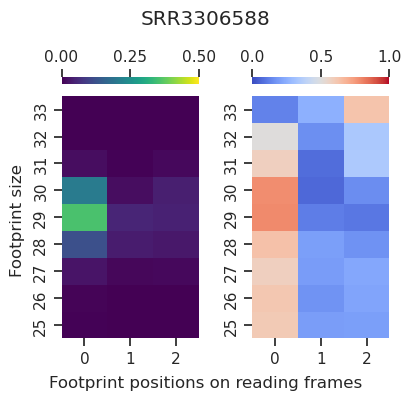

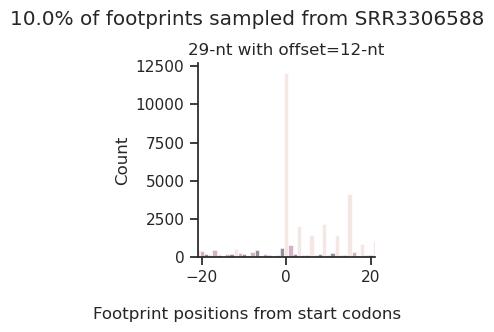

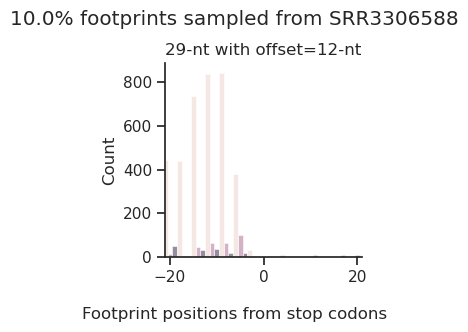

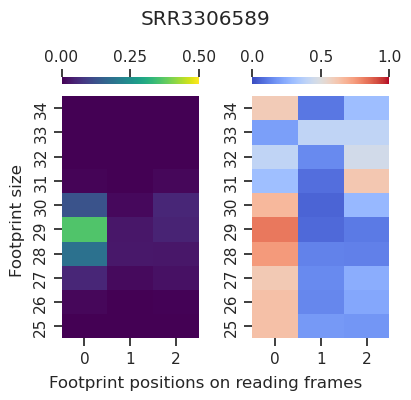

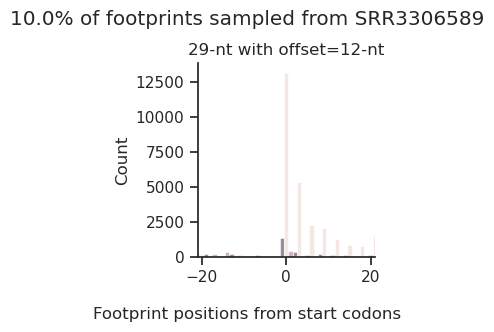

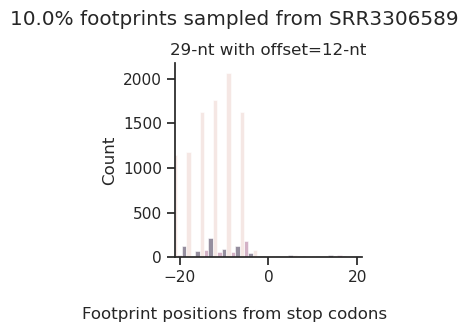

In [1]:
import numpy as np
import pandas as pd

import os
from glob import glob
from riboss.footprints import analyse_footprints


offset_method = '5p'
adj = 12
downsampling = 0.1
outdir = '../results/park_2016_datasets/analyse_footprints'
cds_range = '../ref/hg38/gencode.v47.annotation.cds_range.txt'

footprint_stats = []
for i in glob('../doc/park_2016_datasets/*/*Aligned.out.bam')[:2]:
    stats = analyse_footprints(offset_method, adj, i, downsampling, cds_range, 'best', outdir)
    stats['run'] = os.path.basename(i)
    stats['run'] = stats['run'].str.replace('Aligned.out.bam','')
    footprint_stats.append(stats)

downsampling BAM       : 260126939it [03:28, 1249500.09it/s]
comparing periodicity  : 100%|████████████████████████████████████████| 1/1 [00:00<00:00, 23.48it/s]
INFO:root:saved selected footprint sizes with an offset as ../results/park_2016_datasets/analyse_footprints/SRR3306581Aligned.out.offset.txt
INFO:root:converted mapped frames into heatmaps as ../results/park_2016_datasets/analyse_footprints/SRR3306581Aligned.out.frames.pdf
INFO:root:saved metagene plots as ../results/park_2016_datasets/analyse_footprints/SRR3306581Aligned.out.start_codon.pdf and ../results/park_2016_datasets/analyse_footprints/SRR3306581Aligned.out.stop_codon.pdf
downsampling BAM       : 389697498it [05:01, 1294076.75it/s]


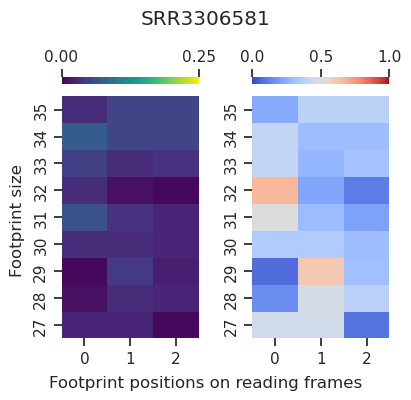

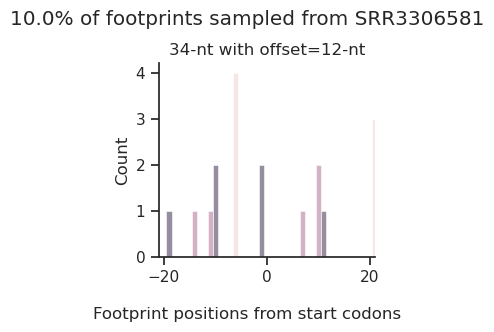

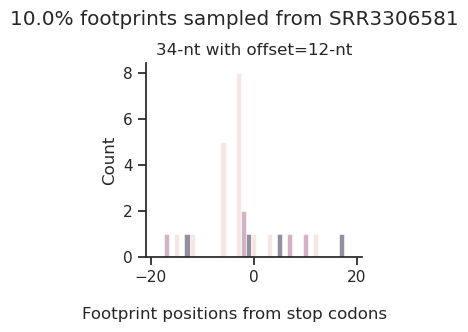

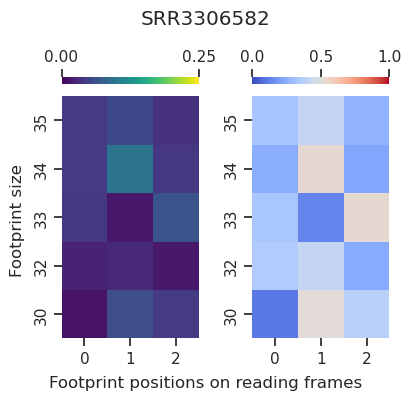

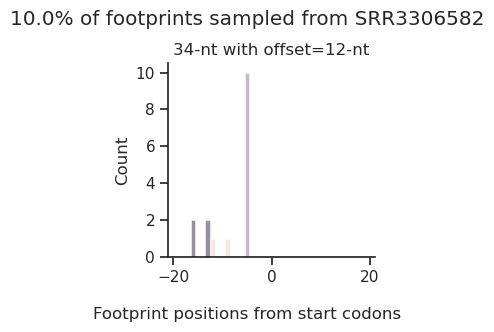

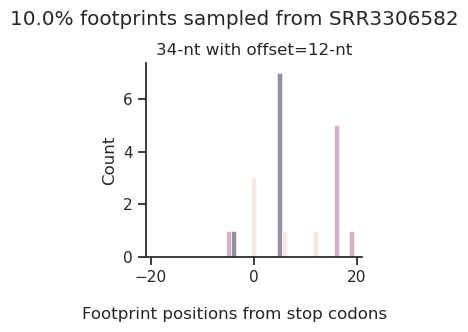

In [2]:
import numpy as np
import pandas as pd
import logging
import os
from glob import glob
from riboss.footprints import analyse_footprints


offset_method = '5p'
adj = 12
downsampling = 0.1
outdir = '../results/park_2016_datasets/analyse_footprints'
cds_range = '../ref/hg38/gencode.v47.annotation.cds_range.txt'


for i in glob('../doc/park_2016_datasets/*/*Aligned.out.bam')[2:]:
    try:
        _ = analyse_footprints(offset_method, adj, i, downsampling, cds_range, 'best', outdir)
    except Exception as e:
        logging.exception('Expected errors for RNA-seq library.')
        pass

#### Merge ribosome profiling and matched RNA-seq data and footprint offset files

In [3]:
! samtools merge \
    ../doc/park_2016_datasets/SRR3306588/SRR3306588Aligned.out.bam \
    ../doc/park_2016_datasets/SRR3306589/SRR3306589Aligned.out.bam \
    -f -o ../doc/park_2016_datasets/SRR3306588_9.bam

! samtools merge \
    ../doc/park_2016_datasets/SRR3306581/SRR3306581Aligned.out.bam \
    ../doc/park_2016_datasets/SRR3306582/SRR3306582Aligned.out.bam \
    -f -o ../doc/park_2016_datasets/SRR3306581_2.bam

! samtools sort ../doc/park_2016_datasets/SRR3306588_9.bam -o ../doc/park_2016_datasets/SRR3306588_9.sorted.bam
! samtools sort ../doc/park_2016_datasets/SRR3306581_2.bam -o ../doc/park_2016_datasets/SRR3306581_2.sorted.bam

! mv ../doc/park_2016_datasets/SRR3306588_9.sorted.bam ../doc/park_2016_datasets/SRR3306588_9.bam
! mv ../doc/park_2016_datasets/SRR3306581_2.sorted.bam ../doc/park_2016_datasets/SRR3306581_2.bam


! paste \
    <(zcat ../doc/park_2016_datasets/SRR3306581/SRR3306581.fastq.gz) \
    <(zcat ../doc/park_2016_datasets/SRR3306582/SRR3306582.fastq.gz) \
    | pigz > ../doc/park_2016_datasets/SRR3306581_2.fastq.gz


! cat \
    ../results/park_2016_datasets/analyse_footprints/SRR3306588Aligned.out.offset.txt \
    ../results/park_2016_datasets/analyse_footprints/SRR3306589Aligned.out.offset.txt \
    | sort -u > ../results/park_2016_datasets/analyse_footprints/SRR3306588_9Aligned.out.offset.txt

#### Build salmon index using transcriptome assembly and run salmon quant

In [1]:
from riboss.wrapper import quantify_transcripts

index = '../ref/hg38/gencode.v47.pc_transcripts_puff'
tx = '../ref/hg38/gencode.v47.pc_transcripts.fa'
rnaseq = '../doc/park_2016_datasets/SRR3306581_2.fastq.gz'
outdir = '../doc/park_2016_datasets/'
clip_3p_adapter_seq = 'TGGAATTCTCGGGTGCC'

quantify_transcripts(rnaseq, tx, adapter=clip_3p_adapter_seq, index=index, outdir=outdir)

Read1 before filtering:
total reads: 57060872
total bases: 5877269816
Q20 bases: 5727101080(97.4449%)
Q30 bases: 5562160731(94.6385%)

Read1 after filtering:
total reads: 56878349
total bases: 5845428775
Q20 bases: 5699665366(97.5064%)
Q30 bases: 5535706500(94.7015%)

Filtering result:
reads passed filter: 56878349
reads failed due to low quality: 43168
reads failed due to too many N: 105484
reads failed due to too short: 33871
reads with adapter trimmed: 439291
bases trimmed due to adapters: 16188432

Duplication rate (may be overestimated since this is SE data): 0.757423%

JSON report: fastp.json
HTML report: fastp.html

fastp -i ../doc/park_2016_datasets/SRR3306581_2.fastq.gz -o ../doc/park_2016_datasets/SRR3306581_2_trimmed.fastq.gz -q 10 -w 8 -a TGGAATTCTCGGGTGCC 
fastp v0.24.0, time used: 223 seconds
Version Info: This is the most recent version of salmon.
-----------------------------------------
| Loading contig table | Time = 103.95 ms
-----------------------------------------

#### Assign footprints to transcripts using riboprof (ribomap)

In [2]:
from riboss.wrapper import riboprofiler

offset = '../results/park_2016_datasets/analyse_footprints/SRR3306588_9Aligned.out.offset.txt'
mrnabam = '../doc/park_2016_datasets/SRR3306581_2.bam'
ribobam = '../doc/park_2016_datasets/SRR3306588_9.bam'
tx = '../ref/hg38/gencode.v47.pc_transcripts.fa'
sf = '../doc/park_2016_datasets/SRR3306581_2_salmon_quant/quant.sf'
out = '../results/park_2016_datasets/riboprofiler/SRR3306588_9'
cds_range_file = '../ref/hg38/gencode.v47.annotation.cds_range.txt'

riboprof_base = riboprofiler(offset, ribobam, mrnabam, 
                             tx, cds_range_file, 
                             sf, out)

getting transcript info...
total number of transcripts in transcriptome: 112218
assigning ribo-seq reads...
constructing profile class...
number of transcripts in profile class: 8651
loading reads from bam...
getting readlen mapping to P site offset...
getting alignment records...
total number of reads: 105598755
getting read type and p-sites...
total output footprint: 105598755
total: 105598755	multi_mapped: 14710709 (13.93 %)
assigning reads to frame 0 loci...
reads used: 32448069 reads assigned: 32448069
assigning reads to frame 1 and 2 loci...
reads used: 38380393 reads assigned: 38380393
assigning reads to UTR loci...
reads used: 41881334 reads assigned: 41881334
assigning RNA-seq reads...
number of transcripts in profile class: 8651
loading reads from bam...
getting alignment records...
total number of reads: 100027580
getting read type and p-sites...
total output footprint: 100027580
total: 100027580	multi_mapped: 29184008 (29.18 %)
assigning reads...
reads used: 100027580 reads

INFO:root:saved main output as ../results/park_2016_datasets/riboprofiler/SRR3306588_9.base


#### Find new ORFs using the main RIBOSS function

##### Use RNA-seq as negatives

parsing ribomap output : 100%|████████████████████████████████| 8.62k/8.62k [00:05<00:00, 1.56kit/s]
parsing ribomap output : 100%|████████████████████████████████| 8.62k/8.62k [00:05<00:00, 1.50kit/s]
INFO:root:saved rprofile as ../results/park_2016_datasets/riboss_rnaseq/SRR3306588_9.riboprof.rprofile.plus.bg and ../results/park_2016_datasets/riboss_rnaseq/SRR3306588_9.riboprof.rprofile.minus.bg
counting footprints    : 100%|██████████████████████████████████| 143k/143k [00:05<00:00, 26.0kit/s]
comparing periodicity  : 100%|████████████████████████████████████| 211/211 [00:09<00:00, 23.43it/s]
INFO:root:saved RIBOSS stats as ../results/park_2016_datasets/riboss_rnaseq/SRR3306588_9.riboss.boss.pkl and ../results/park_2016_datasets/riboss_rnaseq/SRR3306588_9.riboss.boss.csv
INFO:root:saved significant RIBOSS results (n=192) as ../results/park_2016_datasets/riboss_rnaseq/SRR3306588_9.riboss.sig.pkl
--2025-02-20 12:19:50--  https://genome.ucsc.edu/goldenpath/help/examples/bigGenePred.as


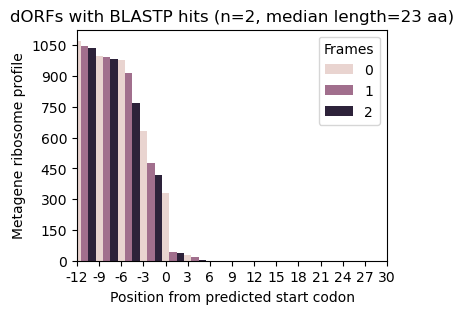

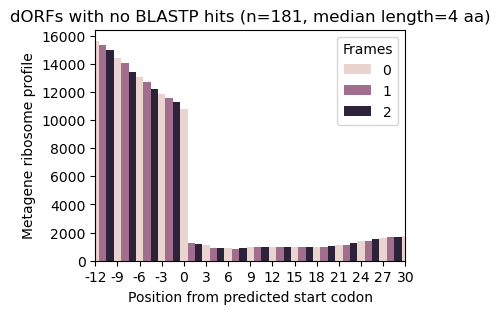

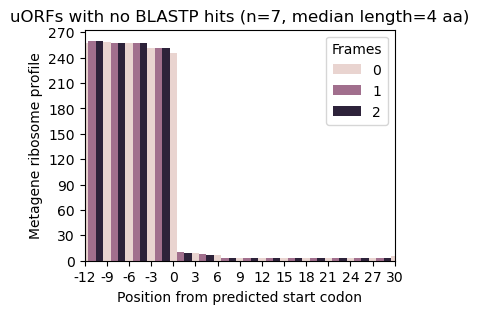

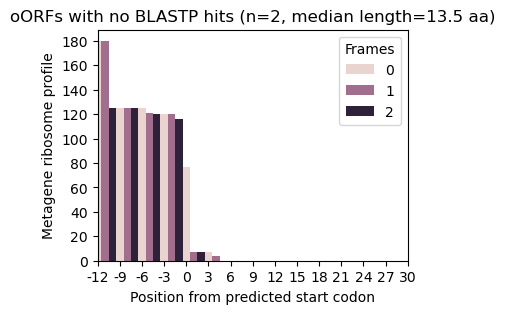

In [1]:
import pandas as pd
from riboss.riboss import riboss


superkingdom = 'Eukaryota'
tx = '../ref/hg38/gencode.v47.pc_transcripts.fa'
fasta = '../ref/hg38/hg38.fa'
riboprof_base = '../results/park_2016_datasets/riboprofiler/SRR3306588_9.base'
profile='rna'
bed = '../ref/hg38/gencode.v47.annotation.bed'
outdir = '../results/park_2016_datasets/riboss_rnaseq'
padj_method = 'fdr_bh'
tie = True
num_simulations = 1000
email='chunshen.lim@otago.ac.nz'
api_key='55890b8dfafe4d49e57c5f1d031aec4c2509'
df = pd.read_pickle('../ref/hg38/gencode.v47.annotation.orf_finder.pkl.gz')

boss_df, sig, blast, tophits, ipg = riboss(superkingdom, df, riboprof_base, profile, fasta, tx, bed=bed,
                                           padj_method=padj_method, tie=tie, num_simulations=num_simulations, 
                                           run_blastp=True, run_efetch=True,
                                           email=email, api_key=api_key, outdir=outdir)

In [2]:
boss_df.shape, sig.shape, blast.shape, tophits.shape

((36935, 14), (192, 20), (233, 15), (192, 26))

In [3]:
boss_df.value_counts('boss')

boss
default              20916
lacks periodicity    15808
dORF                   184
tie                     18
uORF                     7
oORF                     2
Name: count, dtype: int64

##### Use ribosome-profiling as positives

parsing ribomap output : 100%|████████████████████████████████| 8.62k/8.62k [00:05<00:00, 1.57kit/s]
parsing ribomap output : 100%|████████████████████████████████| 8.62k/8.62k [00:05<00:00, 1.52kit/s]
INFO:root:saved rprofile as ../results/park_2016_datasets/riboss/SRR3306588_9.riboprof.rprofile.plus.bg and ../results/park_2016_datasets/riboss/SRR3306588_9.riboprof.rprofile.minus.bg
counting footprints    : 100%|██████████████████████████████████| 143k/143k [00:05<00:00, 26.1kit/s]
comparing periodicity  : 100%|██████████████████████████████████| 2075/2075 [01:31<00:00, 22.76it/s]
INFO:root:saved RIBOSS stats as ../results/park_2016_datasets/riboss/SRR3306588_9.riboss.boss.pkl and ../results/park_2016_datasets/riboss/SRR3306588_9.riboss.boss.csv
INFO:root:saved significant RIBOSS results (n=478) as ../results/park_2016_datasets/riboss/SRR3306588_9.riboss.sig.pkl
--2025-02-20 11:44:01--  https://genome.ucsc.edu/goldenpath/help/examples/bigGenePred.as
Resolving genome.ucsc.edu (genome.u

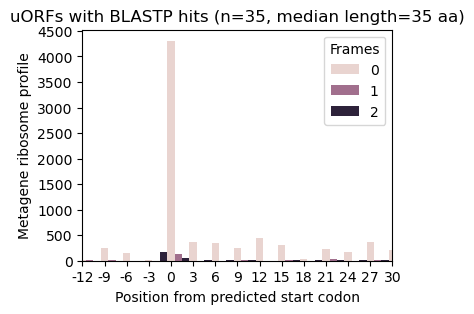

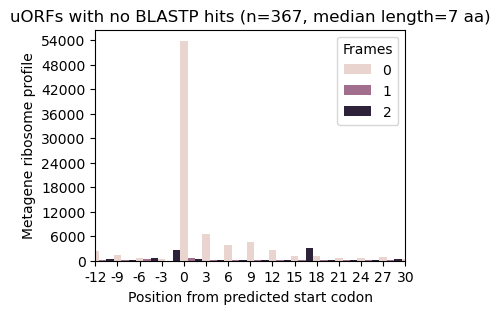

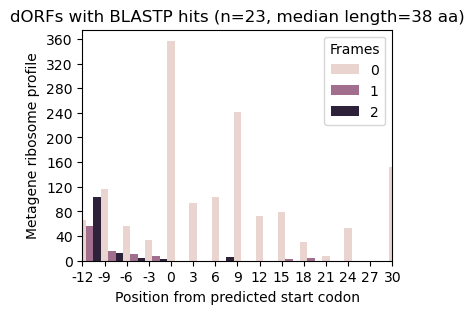

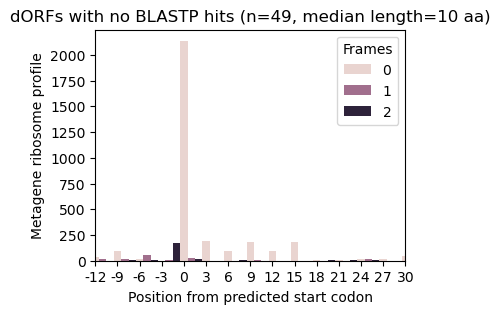

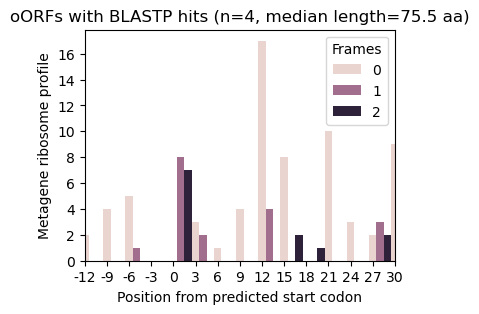

In [1]:
import pandas as pd
from riboss.riboss import riboss


superkingdom = 'Eukaryota'
tx = '../ref/hg38/gencode.v47.pc_transcripts.fa'
fasta = '../ref/hg38/hg38.fa'
riboprof_base = '../results/park_2016_datasets/riboprofiler/SRR3306588_9.base'
profile='ribo'
bed = '../ref/hg38/gencode.v47.annotation.bed'
outdir = '../results/park_2016_datasets/riboss'
padj_method = 'fdr_bh'
tie = True
num_simulations = 1000
email='chunshen.lim@otago.ac.nz'
api_key='55890b8dfafe4d49e57c5f1d031aec4c2509'
df = pd.read_pickle('../ref/hg38/gencode.v47.annotation.orf_finder.pkl.gz')

boss_df, sig, blast, tophits, ipg = riboss(superkingdom, df, riboprof_base, profile, fasta, tx, bed=bed,
                                           padj_method=padj_method, tie=tie, num_simulations=num_simulations, 
                                           run_blastp=True, run_efetch=True, 
                                           email=email, api_key=api_key, outdir=outdir)

In [2]:
boss_df.shape, sig.shape, blast.shape, tophits.shape, ipg.shape

((7729, 14), (478, 20), (1314, 15), (478, 26), (2020, 11))

In [3]:
boss_df.value_counts('boss')

boss
default              5653
tie                  1019
mORF                  509
uORF                  462
dORF                   81
oORF                    4
lacks periodicity       1
Name: count, dtype: int64

In [4]:
boss_df.value_counts(['boss','ORF_type_x'])

boss               ORF_type_x
tie                uORF          726
uORF               uORF          462
mORF               uORF          426
tie                dORF          287
default            uORF          154
dORF               dORF           81
mORF               dORF           78
default            dORF           68
tie                oORF            6
mORF               oORF            5
oORF               oORF            4
default            oORF            3
lacks periodicity  dORF            1
Name: count, dtype: int64

In [1]:
import pandas as pd

sig = pd.read_pickle('../results/park_2016_datasets/riboss/SRR3306588_9.riboss.sig.pkl')
boss_df = pd.read_pickle('../results/park_2016_datasets/riboss/SRR3306588_9.riboss.boss.pkl')
tophits = pd.read_pickle('../results/park_2016_datasets/riboss/SRR3306588_9.riboss.tophits.pkl.gz')
blast = pd.read_pickle('../results/park_2016_datasets/riboss/SRR3306588_9.riboss.sig.blastp.pkl.gz')

In [2]:
sig.columns

Index(['tid', 'boss', 'start_codon_x', 'start_codon_y', 'ORF_range_x',
       'ORF_type_x', 'start_rprofile_x', 'ORF_range_y', 'ORF_type_y',
       'start_rprofile_y', 'tab', 'odds_ratio', 'statistical test', 'result',
       'start', 'end', 'dna', 'aa', 'oid', 'fa'],
      dtype='object')

In [4]:
sig[sig.boss=='dORF']

,tid,boss,start_codon_x,start_codon_y,ORF_range_x,ORF_type_x,start_rprofile_x,ORF_range_y,ORF_type_y,start_rprofile_y,tab,odds_ratio,statistical test,result,start,end,dna,aa,oid,fa
4,ENST00000203630.10,dORF,ATG,ATG,"[967, 1084]",dORF,"[0.0, 0.0, 0.0]","[231, 978]",mORF,"[875.0, 24.0, 19.0]","[[[66, 1, 0], [7280, 760, 506]], [[66, 1], [72...",11.476056,ChiSquare,"(15.535342836534799, 0.0009688558552534312, 0....",967,1084,ATGACTGGTGAGGGCCCCGGGCCCTCAGCCTCTCTTGTACAGGCTG...,MTGEGPGPSASLVQAERLRNHPLNNFFLSIPIPNLILN,ENST00000203630.10__967-1084,>ENST00000203630.10__967-1084\nMTGEGPGPSASLVQA...
7,ENST00000220531.9,dORF,ATG,ATG,"[2141, 2165]",dORF,"[5.0, 0.0, 0.0]","[65, 584]",mORF,"[7.0, 1.0, 12.0]","[[[15, 0, 0], [764, 199, 316]], [[15, 1], [764...",10.100122,ChiSquare,"(15.340621388570144, 0.0010544372179987086, 0....",2141,2165,ATGTATGAATGGTATCTTTTATAA,MYEWYLL,ENST00000220531.9__2141-2165,>ENST00000220531.9__2141-2165\nMYEWYLL
10,ENST00000223641.5,dORF,ATG,ATG,"[456, 507]",dORF,"[0.0, 0.0, 0.0]","[82, 373]",mORF,"[491.0, 4.0, 0.0]","[[[67, 0, 6], [4504, 714, 482]], [[67, 6], [45...",2.964818,ChiSquare,"(19.58801402923416, 0.0001488024299413741, 0.0...",456,507,ATGAGAGAAATTTTCTGTAAGCTTGCTGTTTTACAGGGGATTTATC...,MREIFCKLAVLQGIYQ,ENST00000223641.5__456-507,>ENST00000223641.5__456-507\nMREIFCKLAVLQGIYQ
19,ENST00000239165.9,dORF,ATG,ATG,"[756, 846]",dORF,"[3.0, 0.0, 0.0]","[99, 753]",mORF,"[3.0, 0.0, 0.0]","[[[22, 0, 0], [373, 154, 93]], [[22, 1], [373,...",14.533870,ChiSquare,"(21.856975941605263, 5.1389176691230324e-05, 0...",756,846,ATGGAGAAAGGGCAGAGGAAGAGACATGAGAAAGGGAGAGGAAGAG...,MEKGQRKRHEKGRGREAQLWELNQETQIE,ENST00000239165.9__756-846,>ENST00000239165.9__756-846\nMEKGQRKRHEKGRGREA...
20,ENST00000239165.9,dORF,ATG,ATG,"[1017, 1101]",dORF,"[9.0, 0.0, 0.0]","[99, 753]",mORF,"[3.0, 0.0, 0.0]","[[[18, 0, 0], [373, 154, 93]], [[18, 1], [373,...",11.892072,ChiSquare,"(17.95568591505502, 0.0003162525808279343, 0.0...",1017,1101,ATGAAAAGGATATTATCTACCTGTTCTGTAGCTTTCTGGAATTTAC...,MKRILSTCSVAFWNLPPLFYVAIVRSL,ENST00000239165.9__1017-1101,>ENST00000239165.9__1017-1101\nMKRILSTCSVAFWNL...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,ENST00000680667.1,dORF,ATG,ATG,"[2663, 2702]",dORF,"[0.0, 0.0, 0.0]","[432, 2313]",mORF,"[2.0, 0.0, 2.0]","[[[172, 0, 0], [2258, 94, 351]], [[172, 1], [2...",33.882814,ChiSquare,"(59.81821642226166, 6.676991748668649e-13, 0.0...",2663,2702,ATGGACCATAGATTGCTGTCCCCCTCGACGGACTTATAA,MDHRLLSPSTDL,ENST00000680667.1__2663-2702,>ENST00000680667.1__2663-2702\nMDHRLLSPSTDL
490,ENST00000682559.1,dORF,ATG,ATG,"[327, 336]",dORF,"[67.8133, 4.4614, 0.0]","[211, 670]",mORF,"[1111.78, 16.9533, 0.89228]","[[[122, 14, 0], [3396, 378, 354]], [[122, 15],...",1.752928,ChiSquare,"(23.98718127852052, 1.9076035926602698e-05, 0....",327,336,ATGGTGTAA,MV,ENST00000682559.1__327-336,>ENST00000682559.1__327-336\nMV
495,ENST00000695107.1,dORF,ATG,ATG,"[2380, 2731]",dORF,"[0.0, 0.0, 0.0]","[118, 715]",mORF,"[14.0, 2.0, 0.0]","[[[75, 6, 4], [122, 68, 11]], [[75, 10], [122,...",4.833084,ChiSquare,"(27.225184566374164, 4.099691644777126e-06, 0....",2380,2731,ATGGAAGCGAGTCCTGCGTTCACTCTGTCATTCACGGACCCGAGTG...,MEASPAFTLSFTDPSATSSSHLLSNDSCPAHSVFYGPSIDLVVTLW...,ENST00000695107.1__2380-2731,>ENST00000695107.1__2380-2731\nMEASPAFTLSFTDPS...
498,ENST00000698492.1,dORF,ATG,ATG,"[4081, 4198]",dORF,"[2.0, 0.0, 0.0]","[290, 1538]",mORF,"[9.0, 3.0, 0.0]","[[[335, 2, 3], [690, 39, 84]], [[335, 5], [690...",11.928573,ChiSquare,"(61.01278185830906, 3.824356300557884e-13, 0.0...",4081,4198,ATGGCAGCCTGTCACGCTGATGATAAACTGGCCTTAGTGAACAACA...,MAACHADDKLALVNNTQPKRIDLYLALLSAVSASKFKK,ENST00000698492.1__4081-4198,>ENST00000698492.1__4081-4198\nMAACHADDKLALVNN...


In [3]:
sig.sort_values('odds_ratio', ascending=False)

,tid,boss,start_codon_x,start_codon_y,ORF_range_x,ORF_type_x,start_rprofile_x,ORF_range_y,ORF_type_y,start_rprofile_y,tab,odds_ratio,statistical test,result,start,end,dna,aa,oid,fa
351,ENST00000469257.2,dORF,ATG,ATG,"[798, 846]",dORF,"[24.9005, 0.0, 0.0]","[154, 496]",mORF,"[1125.22, 52.1501, 31.9478]","[[[33, 0, 0], [7397, 4339, 878]], [[33, 0], [7...",inf,ChiSquare,"(35.16561855846214, 9.465516750267033e-08, 0.0...",798,846,ATGGCCGGAACCTCCTCAGCTCTCCCTCTGCAGAGTTCCCTACCCTAA,MAGTSSALPLQSSLP,ENST00000469257.2__798-846,>ENST00000469257.2__798-846\nMAGTSSALPLQSSLP
437,ENST00000591776.5,dORF,ATG,ATG,"[713, 761]",dORF,"[28.0995, 0.0, 0.0]","[152, 518]",mORF,"[1269.78, 58.8499, 36.0522]","[[[37, 0, 0], [8321, 4693, 997]], [[37, 0], [8...",inf,ChiSquare,"(38.491804721731796, 1.9264815041913246e-08, 0...",713,761,ATGGCCGGAACCTCCTCAGCTCTCCCTCTGCAGAGTTCCCTACCCTAA,MAGTSSALPLQSSLP,ENST00000591776.5__713-761,>ENST00000591776.5__713-761\nMAGTSSALPLQSSLP
205,ENST00000367123.8,uORF,ATG,ATG,"[511, 526]",uORF,"[125.38, 0.0, 0.0]","[692, 2072]",mORF,"[38.4375, 0.0, 0.0]","[[[126, 0, 0], [2368, 71, 226]], [[126, 0], [2...",inf,ChiSquare,"(29.052852901160016, 1.7258572516616612e-06, 0...",511,526,ATGTGCCCGCCGTAG,MCPP,ENST00000367123.8__511-526,>ENST00000367123.8__511-526\nMCPP
184,ENST00000355801.4,dORF,ATG,ATG,"[375, 408]",dORF,"[43.6058, 0.889914, 0.0]","[36, 333]",mORF,"[11.5689, 0.0, 0.0]","[[[64, 0, 0], [1147, 178, 294]], [[64, 0], [11...",inf,ChiSquare,"(43.107165436782, 2.0777239624855446e-09, 0.0,...",375,408,ATGGACTTCACTTTCGGCAACAAAACTAAATAA,MDFTFGNKTK,ENST00000355801.4__375-408,>ENST00000355801.4__375-408\nMDFTFGNKTK
111,ENST00000303575.9,dORF,ATG,ATG,"[3228, 3303]",dORF,"[0.0, 0.0, 0.0]","[33, 693]",mORF,"[173.0, 0.0, 7.0]","[[[50, 0, 0], [10247, 740, 844]], [[50, 0], [1...",inf,ChiSquare,"(14.34125676785621, 0.0016612312663679854, 0.0...",3228,3303,ATGGCACTATCTCAGCTCGCTGCAACCTTCACCTCCTGGGTTCAAG...,MALSQLAATFTSWVQAILLPQPPE,ENST00000303575.9__3228-3303,>ENST00000303575.9__3228-3303\nMALSQLAATFTSWVQ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,ENST00000338983.7,uORF,ATG,ATG,"[31, 46]",uORF,"[460.0, 16.0, 38.0]","[195, 1563]",mORF,"[194.0, 7.0, 2.0]","[[[468, 18, 38], [3568, 321, 331]], [[468, 56]...",1.527025,ChiSquare,"(15.186466280578351, 0.0011312294486775923, 0....",31,46,ATGTTCAACTCCTAA,MFNS,ENST00000338983.7__31-46,>ENST00000338983.7__31-46\nMFNS
158,ENST00000337451.8,uORF,ATG,ATG,"[82, 196]",uORF,"[288.0, 0.0, 0.0]","[607, 1690]",mORF,"[49.0, 0.0, 0.0]","[[[953, 31, 90], [1584, 136, 159]], [[953, 121...",1.466629,ChiSquare,"(26.976327953307855, 4.616335332033795e-06, 0....",82,196,ATGGAGGAGGCGGTGCGAACGGCTTCAGCCCCGAATGCTCGCATCT...,MEEAVRTASAPNARISHWTATKAVAVRAQDWAACVGV,ENST00000337451.8__82-196,>ENST00000337451.8__82-196\nMEEAVRTASAPNARISHW...
174,ENST00000347048.8,oORF,ATG,ATG,"[12, 63]",oORF,"[43.0, 18.0, 13.0]","[192, 507]",mORF,"[43.0, 3.80614, 0.0]","[[[331, 75, 14], [1452, 309, 253]], [[331, 89]...",1.439283,ChiSquare,"(38.6830162926837, 1.757473703506456e-08, 0.0,...",12,63,ATGGCGGCCGTCTTCGCTGTGGTGACTTTAACTCTCGGTTTTCGGT...,MAAVFAVVTLTLGFRL,ENST00000347048.8__12-63,>ENST00000347048.8__12-63\nMAAVFAVVTLTLGFRL
107,ENST00000303204.9,uORF,ATG,ATG,"[17, 71]",uORF,"[217.0, 0.0, 1.0]","[187, 847]",mORF,"[47.0, 15.0, 3.0]","[[[1797, 67, 235], [5418, 731, 420]], [[1797, ...",1.264056,ChiSquare,"(181.49728059243574, 9.015212945696143e-39, 0....",17,71,ATGGCGGCGGCGGCGGCGGCGGCAGCTGCTTGGGCGCGGTGCGGTG...,MAAAAAAAAAWARCGGD,ENST00000303204.9__17-71,>ENST00000303204.9__17-71\nMAAAAAAAAAWARCGGD


#### Validate the genePred file for uORFs

In [1]:
! bedtools getfasta -bed ../results/park_2016_datasets/riboss/SRR3306588_9.riboss.boss_tie.uORF.bed -fi ../ref/hg38/hg38.fa -split -name -s -tab \
| cut -f2 | cut -c-3 | sort | uniq -c

     53 atg
      1 Atg
      6 ATg
   1282 ATG


In [2]:
! bedtools getfasta -bed ../results/park_2016_datasets/riboss/SRR3306588_9.riboss.boss_tie.uORF.bed -fi ../ref/hg38/hg38.fa -split -name -s -tab \
| cut -f2 | rev | cut -c-3 | sort | uniq -c

     16 aat
      1 aAT
    268 AAT
     31 agt
      1 agT
      1 aGT
      1 Agt
    718 AGT
     17 gat
      1 gAT
    287 GAT


#### Ribo-Seq ORFs found using RIBOSS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Ribo-Seq ORFs that have over 10 mapped footprints

In [2]:
! cat \
<(awk 'BEGIN{OFS="\t"} {print $1,$2,$3,"riboprof",$4,"+"}' ../results/park_2016_datasets/riboss/SRR3306588_9.riboprof.rprofile.plus.bg) \
<(awk 'BEGIN{OFS="\t"} {print $1,$2,$3,"riboprof",$4,"-"}' ../results/park_2016_datasets/riboss/SRR3306588_9.riboprof.rprofile.minus.bg) \
| bedtools intersect -a ../doc/riboseqorfs/riboseqorfs.uniq.bed -b - \
-s -split -wo | datamash -s -g1,2,3,4,5,6,7,8,9,10,11,12 sum 19 \
| cut -f4,13 > ../results/park_2016_datasets/riboss/SRR3306588_9.riboprof.riboseqorfs.txt

! wc -l ../results/park_2016_datasets/riboss/SRR3306588_9.riboprof.riboseqorfs.txt

334 ../results/park_2016_datasets/riboss/SRR3306588_9.riboprof.riboseqorfs.txt


In [3]:
of_rs_counts = pd.read_csv('../results/park_2016_datasets/riboss/SRR3306588_9.riboprof.riboseqorfs.txt', sep='\t', header=None)
of_rs_counts.columns = ['Ribo-Seq_ORF','counts']
of_rs_counts.shape, of_rs_counts[of_rs_counts['counts']>10].shape

((334, 2), (263, 2))

##### Get Ribo-Seq ORFs that overlap the non-canonical ORFs in the boss results

In [4]:
! cat \
../results/park_2016_datasets/riboss/SRR3306588_9.riboss.boss_tie.uORF.bed \
../results/park_2016_datasets/riboss/SRR3306588_9.riboss.boss_tie.oORF.bed \
../results/park_2016_datasets/riboss/SRR3306588_9.riboss.boss_tie.dORF.bed \
| bedtools intersect -a - -b ../doc/riboseqorfs/riboseqorfs.uniq.bed \
-s -split -wo | awk '($2==$14) && ($3==$15)' \
> ../results/park_2016_datasets/riboss/SRR3306588_9.boss.riboseqorfs.txt

! wc -l ../results/park_2016_datasets/riboss/SRR3306588_9.boss.riboseqorfs.txt

59 ../results/park_2016_datasets/riboss/SRR3306588_9.boss.riboseqorfs.txt


##### Get all Ribo-Seq ORFs detected by RIBOSS orf_finder

In [5]:
! awk 'BEGIN{OFS="\t"} NR>1 {print $1,$8,$9,$2 "__" $5 "-" $6 "|" $NF,$7,$3}' ../results/park_2016_datasets/orf_finder/gencode.v47.annotation.orf_finder.txt \
| bedtools intersect -a - -b ../doc/riboseqorfs/riboseqorfs.uniq.bed -s -split -wo | awk '(($2==$8) || ($3==$9))' \
> ../doc/riboseqorfs/riboseqorfs.orf_finder.txt

! wc -l ../doc/riboseqorfs/riboseqorfs.orf_finder.txt

2754 ../doc/riboseqorfs/riboseqorfs.orf_finder.txt


2754 include double counts

In [6]:
boss_df = pd.read_pickle('../results/park_2016_datasets/riboss/SRR3306588_9.riboss.boss.pkl')
boss_df = boss_df[~boss_df.ORF_range_x.isna()].copy()
boss_df['oid'] = boss_df.tid + '__' + boss_df.ORF_range_x.str[0].astype(int).astype(str) + '-' + boss_df.ORF_range_x.str[1].astype(int).astype(str)

boss_df.shape

(2301, 15)

In [7]:
boss_df.value_counts('boss')

boss
tie                  1019
mORF                  509
uORF                  462
default               225
dORF                   81
oORF                    4
lacks periodicity       1
Name: count, dtype: int64

In [8]:
boss_rs = pd.read_csv('../results/park_2016_datasets/riboss/SRR3306588_9.boss.riboseqorfs.txt', sep='\t', header=None)
bo = pd.merge(boss_df,boss_rs.rename(columns={3:'oid',15:'Ribo-Seq_ORF'}))[['oid','Ribo-Seq_ORF','odds_ratio','boss']]
bo['padj'] = '>0.05'

sig = pd.read_pickle('../results/park_2016_datasets/riboss/SRR3306588_9.riboss.sig.pkl')
so = pd.merge(bo[['oid','Ribo-Seq_ORF']],sig)[['oid','Ribo-Seq_ORF','odds_ratio','boss']]
so['padj'] = '<0.05'

rs_of = pd.read_csv('../doc/riboseqorfs/riboseqorfs.orf_finder.txt', sep='\t', header=None)
rs_of['ORF_length'] = rs_of[16].apply(lambda x: np.sum([int(i) for i in x.split(',')[:-1]]))
rs_of = rs_of[rs_of[4]==rs_of.ORF_length].copy()
rs_of['oid'] = rs_of[3].str.split('|').str[0]
rs_of.rename(columns={9:'Ribo-Seq_ORF'}, inplace=True)
rs_of.shape

(1574, 21)

In [9]:
mo = pd.merge(rs_of[['oid','Ribo-Seq_ORF']], boss_df)[['oid','Ribo-Seq_ORF','odds_ratio','boss']].sort_values('odds_ratio')
mo['check'] = 'check'
mo['padj'] = '>0.05'

boss = pd.concat([so,bo,mo]).drop_duplicates('Ribo-Seq_ORF')

inf = boss[boss.odds_ratio==np.inf].copy()
inf['odds_ratio'] = 100

boss = pd.concat([boss[boss.odds_ratio!=np.inf],inf]).reset_index(drop=True)
boss.reset_index(drop=True, inplace=True)

boss.value_counts(['boss','padj'])

boss     padj 
mORF     >0.05    40
tie      >0.05    26
uORF     <0.05    18
default  >0.05     9
uORF     >0.05     5
dORF     >0.05     1
Name: count, dtype: int64

In [10]:
! cat \
../results/park_2016_datasets/riboss/SRR3306588_9.riboss.boss_tie.uORF.bed \
../results/park_2016_datasets/riboss/SRR3306588_9.riboss.boss_tie.oORF.bed \
../results/park_2016_datasets/riboss/SRR3306588_9.riboss.boss_tie.dORF.bed \
| bedtools intersect -a - -b ../doc/riboseqorfs/riboseqorfs.uniq.bed -s -split -wo \
| grep ENST00000512828

chr4	105708813	105709020	ENST00000512828.1__36-243	0	+	105708813	105709020	0	1	207,	0,	chr4	105708813	105717596	c4riboseqorf74	0	+	105708813	105717596	0	2	203,4,	0,8779,	203


In [11]:
! echo -e "chr4\t105708813\t105709020" | bedtools getfasta -bed - -fi ../ref/hg38/hg38.fa -tab

chr4:105708813-105709020	ATGAATGACGGCCGGCGCGAGTATTTTCCACATAAGGTGGCTGTCGTTTTTCTCCTGGCGTCTGTGGAGGCGAGTGGTCTGCGGGCAGCAGCTCCCAGAGGCAGCCTTGGAATTCCAGCTCGGACTGGGCGGGAAGGCGCAGGCGGCCCAGGTCGCCGACACGCTCACGCACCCTCCCTGCCTGGCCGCGCCTCTGCGACCAGGTAA


In [12]:
ENST00000512828='ATGAATGACGGCCGGCGCGAGTATTTTCCACATAAGGTGGCTGTCGTTTTTCTCCTGGCGTCTGTGGAGGCGAGTGGTCTGCGGGCAGCAGCTCCCAGAGGCAGCCTTGGAATTCCAGCTCGGACTGGGCGGGAAGGCGCAGGCGGCCCAGGTCGCCGACACGCTCACGCACCCTCCCTGCCTGGCCGCGCCTCTGCGACCAGGTAA'

from riboss.riboss import translate
len(translate(ENST00000512828))*3, len(ENST00000512828)

(204, 207)

c4riboseqorf74 has a stop codon and should be shorter

In [13]:
boss = boss[(boss.boss!='default')].copy()
# de['padj'] = '<0.05'

# boss = pd.concat([de,boss]).drop_duplicates('Ribo-Seq_ORF')
boss.value_counts(['boss','padj'])

boss  padj 
mORF  >0.05    40
tie   >0.05    26
uORF  <0.05    18
      >0.05     5
dORF  >0.05     1
Name: count, dtype: int64

In [14]:
boss.shape

(90, 6)

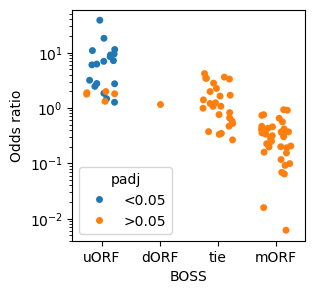

In [15]:
fig, ax = plt.subplots(figsize=(3,3))
sns.stripplot(data=boss, x='boss', y='odds_ratio', hue='padj', jitter=0.26, log_scale=True, ax=ax)
plt.xlabel('BOSS')
plt.ylabel('Odds ratio')
plt.savefig('../results/park_2016_datasets/riboss/SRR3306588_9.boss.riboseqorfs.pdf', bbox_inches ='tight')

#### Performance assessment

In [16]:
rsi = pd.read_csv('../doc/riboseqorfs/riboseqorfs.intersection.txt')
brs = pd.merge(rsi, boss[boss.boss!='mORF'], how='outer')[['Ribo-Seq_ORF','oid']]
brs['y_true'] = 1

brs_fn = brs[brs.oid.isna()].copy()
brs_fn['y_pred'] = -1
brs_tp = brs[~brs.oid.isna()].copy()
brs_tp['y_pred'] = 1

brs = pd.concat([brs_tp, brs_fn])
brs.drop('oid', axis=1, inplace=True)
brs.columns = ['id','y_true','y_pred']

rs_counts = pd.read_csv('../results/park_2016_datasets/riboss/SRR3306588_9.riboprof.riboseqorfs.txt', header=None, sep='\t')
rs_counts.columns = ['id','counts']
rs_counts = rs_counts[rs_counts['counts']>10].copy()
brs = pd.merge(brs, rs_counts[['id']])

brs.shape

(128, 3)

In [17]:
boss_rna = pd.read_pickle('../results/park_2016_datasets/riboss_rnaseq/SRR3306588_9.riboss.boss.pkl')
boss_rna.value_counts('boss')

boss
default              20916
lacks periodicity    15808
dORF                   184
tie                     18
uORF                     7
oORF                     2
Name: count, dtype: int64

In [18]:
# exclude default as no comparisons can be made
boss_rna = boss_rna[(boss_rna.boss!='default')].copy()

b_fp = boss_rna[(boss_rna.boss!='lacks periodicity')].copy()
b_fp['y_pred'] = 1
b_tn = boss_rna[(boss_rna.boss=='lacks periodicity')].copy()
b_tn['y_pred'] = -1

brna = pd.concat([b_fp,b_tn])
brna = brna[~brna.ORF_range_x.isna()].copy()
brna['oid'] = brna.tid + '__' + brna.ORF_range_x.str[0].astype(int).astype(str) + '-' + brna.ORF_range_x.str[1].astype(int).astype(str)

of_rt_id = pd.read_csv('../ref/hg38/orf_finder_ribotricer.intersection.txt', sep='\t')
brna = pd.merge(of_rt_id,brna[['oid','y_pred']])
brna['y_true'] = -1
brna.drop('oid', axis=1, inplace=True)
brna.columns = ['id','y_pred','y_true']

brna.value_counts('y_pred')

y_pred
-1    4705
 1      14
Name: count, dtype: int64

In [19]:
bperf = pd.concat([brna,brs])
bperf.to_pickle('../results/park_2016_datasets/riboss/boss_perf.pkl.gz')
bperf.value_counts(['y_true','y_pred'])

y_true  y_pred
-1      -1        4705
 1      -1          88
         1          40
-1       1          14
Name: count, dtype: int64

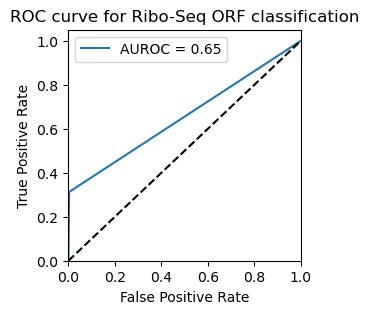

In [20]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, matthews_corrcoef, f1_score


fpr, tpr, thresholds = roc_curve(bperf.y_true, bperf.y_pred) 
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(3,3))  
plt.plot(fpr, tpr, label='AUROC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Ribo-Seq ORF classification')
plt.legend()

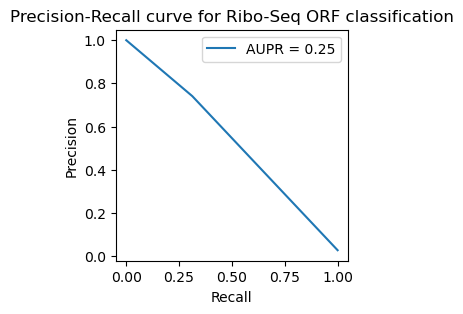

In [21]:
precision, recall, thresholds = precision_recall_curve(bperf.y_true, bperf.y_pred)
average_precision = average_precision_score(bperf.y_true, bperf.y_pred)

plt.figure(figsize=(3,3))
plt.plot(recall, precision, label='AUPR = %0.2f' % average_precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Precision-Recall curve for Ribo-Seq ORF classification")
plt.legend()

In [22]:
matthews_corrcoef(bperf.y_true, bperf.y_pred)

0.47286450396681284

In [23]:
f1_score(bperf.y_true, bperf.y_pred)

0.43956043956043955